In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

In [2]:
####################################
# Carga de la imagen desde archivo #
####################################

#Carga de la imagen
img = cv2.imread('mandril.jpg') 

#Si hay lectura correcta
if img is not None:
    #Recordar que OpenCV lee las imágenes almacenando en formato BGR, por lo que convertimos para visualizr de forma correcta a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
else: 
    print('Imagen no encontrada')

# Conversión a grises para su procesamiento
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)

(0.0, 512.0)

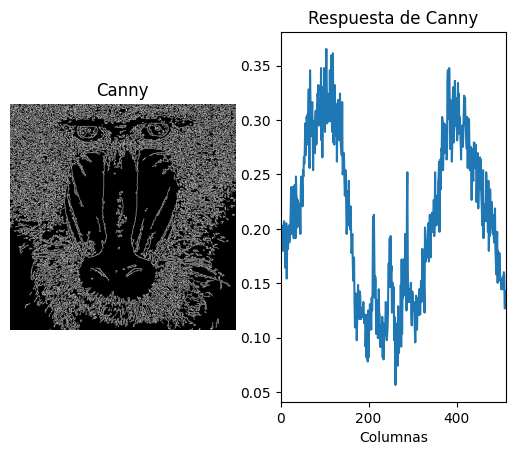

In [3]:
#######################################################
# Calculo del número de píxeles no nulos por columnas #
#######################################################

#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[0])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[1]])


1-TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el máximo para filas y columnas (uno para cada) y muestra el número de filas con un número de píxeles blancos mayor o igual que 0.95*máximo.

Valor máximo de píxeles blancos por fila (maxfil): 220.0
Umbral de 0.95 * maxfil: 209.0
Filas con un número de píxeles blancos mayor o igual que 0.95 * maxfil (umbral: 209.0):
Total de filas que cumplen la condición: 2
Posiciones de las filas que cumplen la condición: [ 12 100]


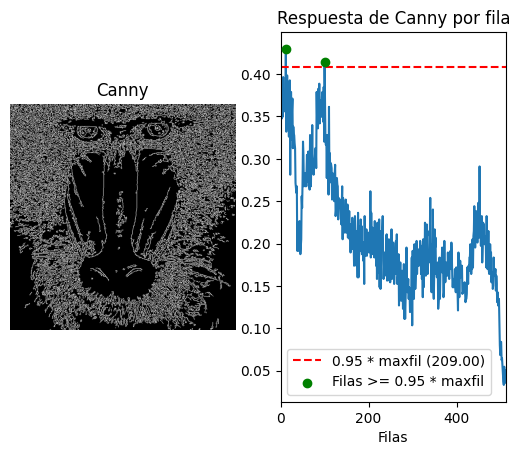

In [4]:
####################################################
# Calculo del número de píxeles no nulos por FILAS #
####################################################

# Cuenta el número de píxeles blancos (255) por fila (suma los valores de los píxeles por fila)
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Los valores de row_counts ya contienen la suma total de los valores por fila (número total de píxeles blancos * 255)
# Calcula el número real de píxeles blancos por fila (dividiendo por 255)
white_pixels_per_row = row_counts[:, 0] / 255

# Determina el valor máximo de píxeles blancos por fila (sin normalizar)
maxfil = white_pixels_per_row.max()

# Encuentra las filas donde el número de píxeles blancos es mayor o igual que 0.95 * maxfil
threshold = 0.95 * maxfil
filas_mayor_95 = np.where(white_pixels_per_row >= threshold)[0]

# Mostrar todas las filas que cumplen la condición
print(f"Valor máximo de píxeles blancos por fila (maxfil): {maxfil}")
print(f"Umbral de 0.95 * maxfil: {threshold}")
print(f"Filas con un número de píxeles blancos mayor o igual que 0.95 * maxfil (umbral: {threshold}):")
print(f"Total de filas que cumplen la condición: {len(filas_mayor_95)}")
print(f"Posiciones de las filas que cumplen la condición: {filas_mayor_95}")

# Para visualizar mejor, se puede mostrar también la gráfica de los resultados
# Normaliza para visualizar el porcentaje de píxeles blancos por fila
rows_normalized = white_pixels_per_row / canny.shape[1]

plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny por fila")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows_normalized)
plt.axhline(y=threshold / canny.shape[1], color='r', linestyle='--', label=f"0.95 * maxfil ({threshold:.2f})")
plt.scatter(filas_mayor_95, rows_normalized[filas_mayor_95], color='g', zorder=5, label="Filas >= 0.95 * maxfil")
plt.legend()
# Rango en x definido por las filas
plt.xlim([0, canny.shape[0]])

plt.show()


2- TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

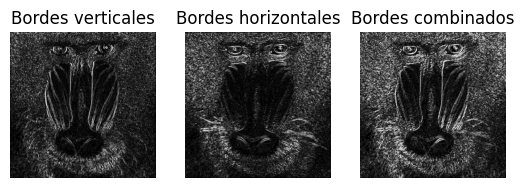

In [5]:
#########
# Sobel #
#########
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Muestra ambos resultados
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Bordes verticales')
#Verticales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Prueba sin convertir escala

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Bordes horizontales')
#Horizontales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Prueba sin convertir escala

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Bordes combinados')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray') 
#plt.imshow(sobel, cmap='gray') #Prueba sin convertir escala
plt.show()

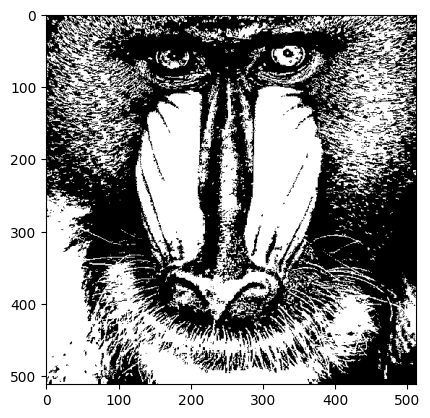

In [6]:
###############
# Umbralizado #
###############

#Define valor umbral
valorUmbral = 130 #Prueba otros valores
#Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(gris, valorUmbral, 255, cv2.THRESH_BINARY)
#Muestra resultado
plt.imshow(imagenUmbralizada, cmap='gray')
plt.show()

Valor máximo de píxeles blancos por columna (maxcol): 372.0
Umbral de 0.95 * maxcol: 353.4
Columnas con un número de píxeles blancos mayor o igual que 0.95 * maxcol (umbral: 353.4):
Total de columnas que cumplen la condición: 34
Posiciones de las columnas que cumplen la condición: [ 34 179 180 181 182 183 193 194 195 196 199 293 294 295 296 297 301 302
 303 312 313 320 321 322 323 326 327 328 329 330 331 332 333 334]


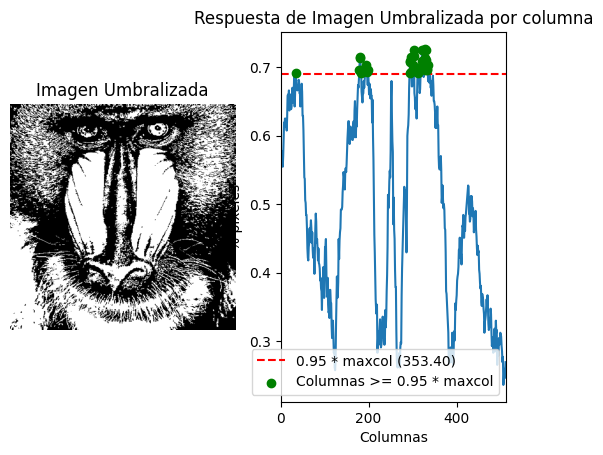

In [7]:
######################################################
# Calculo del número de píxeles no nulos por COLUMNAS #
######################################################

# Cuenta el número de píxeles blancos (255) por columna (suma los valores de los píxeles por columna)
col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Los valores de col_counts ya contienen la suma total de los valores por columna (número total de píxeles blancos * 255)
# Calcula el número real de píxeles blancos por columna (dividiendo por 255)
white_pixels_per_col = col_counts[0] / 255

# Determina el valor máximo de píxeles blancos por columna (sin normalizar)
maxcol = white_pixels_per_col.max()

# Encuentra las columnas donde el número de píxeles blancos es mayor o igual que 0.95 * maxcol
threshold = 0.95 * maxcol
columnas_mayor_95 = np.where(white_pixels_per_col >= threshold)[0]

# Mostrar todas las columnas que cumplen la condición
print(f"Valor máximo de píxeles blancos por columna (maxcol): {maxcol}")
print(f"Umbral de 0.95 * maxcol: {threshold}")
print(f"Columnas con un número de píxeles blancos mayor o igual que 0.95 * maxcol (umbral: {threshold}):")
print(f"Total de columnas que cumplen la condición: {len(columnas_mayor_95)}")
print(f"Posiciones de las columnas que cumplen la condición: {columnas_mayor_95}")

# Para visualizar mejor, se puede mostrar también la gráfica de los resultados
# Normaliza para visualizar el porcentaje de píxeles blancos por columna
cols_normalized = white_pixels_per_col / imagenUmbralizada.shape[0]

plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Imagen Umbralizada")
plt.imshow(imagenUmbralizada, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Imagen Umbralizada por columna")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols_normalized)
plt.axhline(y=threshold / imagenUmbralizada.shape[0], color='r', linestyle='--', label=f"0.95 * maxcol ({threshold:.2f})")
plt.scatter(columnas_mayor_95, cols_normalized[columnas_mayor_95], color='g', zorder=5, label="Columnas >= 0.95 * maxcol")
plt.legend()
# Rango en x definido por las columnas
plt.xlim([0, imagenUmbralizada.shape[1]])

plt.show()


Valor máximo de píxeles blancos por fila (maxfil): 392.0
Umbral de 0.95 * maxfil: 372.4
Filas con un número de píxeles blancos mayor o igual que 0.95 * maxfil (umbral: 372.4):
Total de filas que cumplen la condición: 9
Posiciones de las filas que cumplen la condición: [449 450 451 452 453 454 457 458 464]


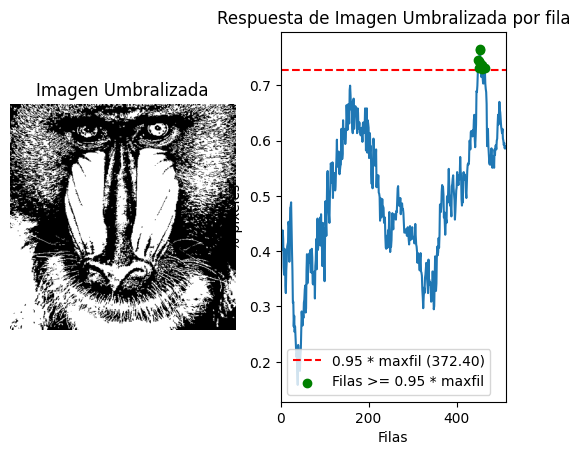

In [8]:
####################################################
# Calculo del número de píxeles no nulos por FILAS #
####################################################

# Cuenta el número de píxeles blancos (255) por fila (suma los valores de los píxeles por fila)
row_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Los valores de row_counts ya contienen la suma total de los valores por fila (número total de píxeles blancos * 255)
# Calcula el número real de píxeles blancos por fila (dividiendo por 255)
white_pixels_per_row = row_counts[:, 0] / 255

# Determina el valor máximo de píxeles blancos por fila (sin normalizar)
maxfil = white_pixels_per_row.max()

# Encuentra las filas donde el número de píxeles blancos es mayor o igual que 0.95 * maxfil
threshold = 0.95 * maxfil
filas_mayor_95 = np.where(white_pixels_per_row >= threshold)[0]

# Mostrar todas las filas que cumplen la condición
print(f"Valor máximo de píxeles blancos por fila (maxfil): {maxfil}")
print(f"Umbral de 0.95 * maxfil: {threshold}")
print(f"Filas con un número de píxeles blancos mayor o igual que 0.95 * maxfil (umbral: {threshold}):")
print(f"Total de filas que cumplen la condición: {len(filas_mayor_95)}")
print(f"Posiciones de las filas que cumplen la condición: {filas_mayor_95}")

# Para visualizar mejor, se puede mostrar también la gráfica de los resultados
# Normaliza para visualizar el porcentaje de píxeles blancos por fila
rows_normalized = white_pixels_per_row / imagenUmbralizada.shape[1]

plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Imagen Umbralizada")
plt.imshow(imagenUmbralizada, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Imagen Umbralizada por fila")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows_normalized)
plt.axhline(y=threshold / imagenUmbralizada.shape[1], color='r', linestyle='--', label=f"0.95 * maxfil ({threshold:.2f})")
plt.scatter(filas_mayor_95, rows_normalized[filas_mayor_95], color='g', zorder=5, label="Filas >= 0.95 * maxfil")
plt.legend()
# Rango en x definido por las filas
plt.xlim([0, imagenUmbralizada.shape[0]])

plt.show()


3- TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.

In [18]:
import cv2
import numpy as np

# Función para mostrar la cámara sin efectos
def mostrar_camara_sola(frame):
    # Simplemente devolvemos el frame sin modificaciones
    return frame

# Función para aplicar Sobel en los ejes X e Y con reducción de resolución
def aplicar_sobel(frame):
    # Redimensionamos la imagen a la mitad de su tamaño original
    h, w, _ = frame.shape
    frame_resized = cv2.resize(frame, (w // 2, h // 2))

    # Convertimos la imagen a escala de grises
    gray = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY)
    
    # Aplicamos Sobel en la dirección X y Y
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)  # Sobel en el eje X (Horizontal)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)  # Sobel en el eje Y (Vertical)
    
    # Tomamos el valor absoluto y convertimos a uint8
    sobelx = np.uint8(np.absolute(sobelx))
    sobely = np.uint8(np.absolute(sobely))
    
    # Combinamos ambos sobelx y sobely
    sobel_combined = cv2.bitwise_or(sobelx, sobely)

    # Convertimos los bordes detectados a imágenes de color (opcional para una visualización más atractiva)
    sobelx_colored = cv2.cvtColor(sobelx, cv2.COLOR_GRAY2BGR)
    sobely_colored = cv2.cvtColor(sobely, cv2.COLOR_GRAY2BGR)
    sobel_combined_colored = cv2.cvtColor(sobel_combined, cv2.COLOR_GRAY2BGR)

    # Crear un collage 2x2 con las imágenes Sobel
    top_row = np.hstack((sobelx_colored, sobely_colored))
    bottom_row = np.hstack((sobel_combined_colored, frame_resized))  # Incluimos la imagen redimensionada
    collage = np.vstack((top_row, bottom_row))
    
    return collage

# Función para aplicar el efecto Pop Art
def aplicar_pop_art(frame):
    # Redimensionar la imagen a la mitad
    h, w, _ = frame.shape
    frame_resized = cv2.resize(frame, (w // 2, h // 2))

    # Convertir la imagen a escala de grises
    gray_frame = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY)

    # Aplicar el efecto de contorno
    edges = cv2.Canny(gray_frame, 100, 200)

    # Crear una imagen en color a partir de los bordes
    edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    # Aplicar diferentes esquemas de color al fotograma
    pop_art_frames = []
    colors = [
        (255, 105, 180),  # Hot Pink
        (102, 205, 170),  # Medium Aquamarine
        (138, 43, 226),   # Blue Violet
        (255, 215, 0)     # Gold
    ]
    
    for color in colors:
        # Crear una máscara usando los bordes y aplicar color
        color_mask = np.zeros_like(edges_colored)
        color_mask[:, :] = color
        pop_frame = cv2.addWeighted(edges_colored, 0.5, color_mask, 0.5, 0)
        pop_art_frames.append(pop_frame)

    # Crear una cuadrícula 2x2 de las imágenes pop art
    top_row = np.hstack((pop_art_frames[0], pop_art_frames[1]))
    bottom_row = np.hstack((pop_art_frames[2], pop_art_frames[3]))
    collage = np.vstack((top_row, bottom_row))

    return collage

# Función para mostrar el menú de opciones en pantalla
def mostrar_opciones(frame, efecto_seleccionado):
    # Crear un texto con las opciones
    texto = "Opciones: 1-Sobel 2-Pop Art 3-Camara 'q'-Salir"
    
    # Mostrar el efecto seleccionado
    efecto_texto = f"Efecto seleccionado: {efecto_seleccionado.capitalize()}"
    
    # Colocar el texto en el frame
    cv2.putText(frame, texto, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
    cv2.putText(frame, efecto_texto, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    return frame

# Función principal para capturar la cámara o video y aplicar las transformaciones en tiempo real
def main():
    # Capturamos video de la webcam
    cap = cv2.VideoCapture(0)

    # Variable para controlar el efecto seleccionado
    efecto_seleccionado = 'camara sola'

    while True:
        # Leemos un frame de la cámara
        ret, frame = cap.read()
        if not ret:
            break

        # Aplicar efectos según el efecto seleccionado
        if efecto_seleccionado == 'sobel':
            resultado = aplicar_sobel(frame)
        elif efecto_seleccionado == 'pop_art':
            resultado = aplicar_pop_art(frame)
        else:
            resultado = mostrar_camara_sola(frame)

        # Mostrar las opciones en pantalla
        resultado = mostrar_opciones(resultado, efecto_seleccionado)

        # Mostramos el resultado en una ventana de video
        cv2.imshow('Efectos en Tiempo Real', resultado)

        # Esperamos una tecla para cambiar de efecto
        key = cv2.waitKey(1) & 0xFF
        if key == ord('q'):
            # Salimos del bucle si presionamos 'q'
            break
        elif key == ord('1'):
            # Seleccionamos Sobel al presionar '1'
            efecto_seleccionado = 'sobel'
        elif key == ord('2'):
            # Seleccionamos Pop Art al presionar '2'
            efecto_seleccionado = 'pop_art'
        elif key == ord('3'):
            # Seleccionamos Cámara Sola al presionar '3'
            efecto_seleccionado = 'camara sola'

    # Liberamos el recurso de la cámara y cerramos las ventanas
    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


4- TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [11]:
import cv2
import numpy as np

# Cargar el clasificador preentrenado de Haar Cascade para la detección de rostros
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Cargar la imagen del sombrero con fondo transparente
sombrero_img = cv2.imread('sombrero.png', cv2.IMREAD_UNCHANGED)  # IMREAD_UNCHANGED para cargar la transparencia

# Verificar si la imagen del sombrero fue cargada correctamente
if sombrero_img is None:
    print("Error: No se pudo cargar la imagen del sombrero.")
    exit()

# Función para superponer el sombrero sobre la cabeza
def superponer_sombrero(frame, x, y, w, h):
    # Redimensionar el sombrero al tamaño adecuado basado en el ancho del rostro
    sombrero_width = int(w * 1.2)  # Un poco más ancho que la cara
    sombrero_height = int(sombrero_width * sombrero_img.shape[0] / sombrero_img.shape[1])  # Mantener la proporción del sombrero
    sombrero_resized = cv2.resize(sombrero_img, (sombrero_width, sombrero_height))

    # Obtener las dimensiones de la imagen redimensionada
    h_sombrero, w_sombrero, _ = sombrero_resized.shape
    
    # Ajustar la posición del sombrero un poco más abajo sobre la cabeza
    offset = int(h * 0.2)  # Ajuste de desplazamiento hacia abajo, lo calculamos como el 20% de la altura de la cara
    y_sombrero = y - h_sombrero + offset  # Posicionar el sombrero más abajo
    x_sombrero = x - int((sombrero_width - w) / 2)  # Centrar el sombrero con la cara

    # Verificar que el sombrero no salga de los límites del frame
    y1, y2 = max(0, y_sombrero), min(frame.shape[0], y_sombrero + h_sombrero)
    x1, x2 = max(0, x_sombrero), min(frame.shape[1], x_sombrero + w_sombrero)

    # Recortar el sombrero si sale fuera de los bordes del frame
    sombrero_crop_y1 = 0 if y1 == y_sombrero else y1 - y_sombrero
    sombrero_crop_y2 = h_sombrero if y2 == y_sombrero + h_sombrero else h_sombrero - (y_sombrero + h_sombrero - y2)
    sombrero_crop_x1 = 0 if x1 == x_sombrero else x1 - x_sombrero
    sombrero_crop_x2 = w_sombrero if x2 == x_sombrero + w_sombrero else w_sombrero - (x_sombrero + w_sombrero - x2)

    # Separar los canales de color y el canal alfa (transparencia)
    sombrero_rgb = sombrero_resized[sombrero_crop_y1:sombrero_crop_y2, sombrero_crop_x1:sombrero_crop_x2, :3]  # RGB
    sombrero_alpha = sombrero_resized[sombrero_crop_y1:sombrero_crop_y2, sombrero_crop_x1:sombrero_crop_x2, 3] / 255.0  # Alfa

    # Recortar la porción del frame donde se va a superponer el sombrero
    region_interes = frame[y1:y2, x1:x2]

    # Superponer el sombrero utilizando el canal alfa para la transparencia
    for c in range(0, 3):  # Aplicamos a los tres canales de color
        region_interes[:, :, c] = region_interes[:, :, c] * (1 - sombrero_alpha) + sombrero_rgb[:, :, c] * sombrero_alpha

    # Colocar la región modificada de nuevo en el frame
    frame[y1:y2, x1:x2] = region_interes

# Inicializar la captura de video
cap = cv2.VideoCapture(0)

# Verificar si la cámara se ha abierto correctamente
if not cap.isOpened():
    print("Error: No se pudo acceder a la cámara.")
    exit()

while True:
    # Capturar el video cuadro por cuadro
    ret, frame = cap.read()

    # Verificar si se ha leído un fotograma válido
    if not ret:
        print("Error: No se pudo leer el fotograma.")
        break

    # Convertir la imagen a escala de grises para la detección de rostros
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detectar rostros en la imagen
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100))

    # Para cada rostro detectado, superponer el sombrero
    for (x, y, w, h) in faces:
        superponer_sombrero(frame, x, y, w, h)

    # Mostrar el resultado en una ventana
    cv2.imshow('Rostro con sombrero', frame)

    # Presionar 'q' para salir del bucle
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar la captura y cerrar las ventanas
cap.release()
cv2.destroyAllWindows()
